# HW7 (60 points)

This homework also requires the wine.data CSV and winequality-red.csv, found where you downloaded this .ipynb file.

# Problem 1:  Recursion on a Tree (8 points)


In [3]:
class BinaryTree():
  def __init__(self, left, right, value):
    self.left = left
    self.right = right
    self.value = value

sample_tree = BinaryTree(BinaryTree(BinaryTree(None,None,1),
                                    BinaryTree(None,None,2),
                                    3),
                         BinaryTree(BinaryTree(BinaryTree(None,None,4),
                                               BinaryTree(None,None,5),
                                               6),
                                    BinaryTree(None,None,7),
                                    8),
                         9)
sample_tree2 = BinaryTree(None, BinaryTree(None, BinaryTree(None, BinaryTree(None,None,1),2),3),4)

Write a function count_full_branches() that takes a binary tree and *recursively* counts the number of nodes that have both a left and right child.  Assume the tree argument was created using the provided binary tree class.  A missing child is signified by a left or right field that is None.  (The value field is not useful for this exercise.)

In [14]:
# TODO count_full_branches()
def count_full_branches(tree):
 
    if (tree == None):
        return 0
      
    branch = 0
    if (tree.left and tree.right):
        branch += 1
      
    branch += (count_full_branches(tree.left) + 
            count_full_branches(tree.right)) 
    return branch 

In [15]:
print(count_full_branches(sample_tree)) # Expect 4
print(count_full_branches(sample_tree2)) # Expect 0

4
0


# Problem 2:  Nearest neighbors (18 points:  4,3,4,3,4)

In this problem, we'll train on a dataset where the labels are different varieties ("cultivars") of wine, and the features are different chemical measurements of the wine.

Upload the wine.data file.

In [16]:
from google.colab import files

uploaded = files.upload() # Upload wine.data

Saving wine.data to wine.data


We next set up a dataframe to organize the data.

In [57]:
# wine.data:  see https://archive.ics.uci.edu/ml/datasets/Wine

import pandas as pd

col_names = ['Type','Alcohol','Malic acid','Ash','Alcalinity of ash',
             'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
             'Proanthocyanins','Color intensity','Hue','OD280/OD315','Proline']

df = pd.read_csv('wine.data', names =col_names)
df.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


We then separate the data into features (X) and labels (y).

In [58]:
y = df['Type']

In [59]:
X = df.iloc[:,1:]

a, 4 pts) Explain what the next code box is doing, and why it is important to do it for a nearest neighbors classifier training on this data.

In [60]:
for col in range(13):
  X.iloc[:,col] = X.iloc[:,col]/X.iloc[:,col].max()

In [61]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,0.959541,0.294828,0.752322,0.520000,0.783951,0.721649,0.602362,0.424242,0.639665,0.433846,0.608187,0.9800,0.633929
1,0.890088,0.306897,0.662539,0.373333,0.617284,0.682990,0.543307,0.393939,0.357542,0.336923,0.614035,0.8500,0.625000
2,0.887390,0.406897,0.826625,0.620000,0.623457,0.721649,0.637795,0.454545,0.784916,0.436923,0.602339,0.7925,0.705357
3,0.968982,0.336207,0.773994,0.560000,0.697531,0.992268,0.687008,0.363636,0.608939,0.600000,0.502924,0.8625,0.880952
4,0.892785,0.446552,0.888545,0.700000,0.728395,0.721649,0.529528,0.590909,0.508380,0.332308,0.608187,0.7325,0.437500


The code is finding the original value divided by the max value in that column. It is important for a nearest neightbors classifier training on this data because the algorithm will help us classify the input value into the column that it's closest to. If a value were to be added to the data, the nearest neighbors classifier would be able to locate the column it's closest to. 

b, 3 pts) Now use scikit-learn's train_test_split() function to separate X and y into training and test sets.  Pass in the argument random_state=110 so that your split is consistent with other students' and ours.

In [74]:
# TODO
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 110)

c, 4 pts) Train a k-nearest neighbors classifier on the training data, where k is 3.

In [77]:
# TODO
from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_neighbors=3)
nbrs.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

d, 3 pts) Use the score() method of the nearest neighbors classifier on the test data, to determine how well this classifier does on the withheld data.

In [79]:
# TODO
nbrs.score(X_train,y_train)

0.9849624060150376

e, 4pts) Evaluating with score() on the training data instead of the testing data should give 100% accuracy if k=1.  Why?

This is because k = 1 is trained using the training data and then is evaluated on the same training data.

# Problem 3:  Decision trees (22 points:  8, 6, 4, 4)

a, 8 pts) Using the same train/test split as the previous problem, train a scikit-learn entropy-based decision tree classifier on the scaled data, and use score() to evaluate the classifier.  When creating the DecisionTreeClassifier, pass in the argument random_state=110 so that we can be sure its performance matches expectations.

In [39]:
# TODO train and evaluate DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion="entropy", random_state=110)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=110)

b, 6 pts) What does "overfitting" mean?  Call score() on the training data.  Is this performance consistent with the idea that the model is overfitting?

In [40]:
# TODO call score()
from sklearn.model_selection import cross_val_score
decisiontree.score(X_test, y_test)

0.9555555555555556

**TODO overfitting explanation and whether model appears to be overfitting**
Overfitting is when there's a hypothesis that agrees with the training data but not the test data. This model could be overfitting as many numbers are similar. 

c, 4 points) Experiment with setting the following parameters of the DecisionTreeClassifier constructor:  max_depth=3, min_samples_leaf=8.  Does the evidence from train and test performance suggest the model is overfitting now?  

In [43]:
# TODO evaluate a DecisionTreeClassifier with the given parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 3, min_samples_leaf = 8, random_state=110)
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.9111111111111111

**TODO is there evidence of overfitting now?**
After messing around with the depth and leaf and the result being less than the previous box's (further from 100), this does suggest overfitting.

d, 4 points) Using tree.plot_tree(), draw the tree you made in part (c).  You don't need to name the types or features.

[Text(0.4444444444444444, 0.875, 'x[6] <= 0.276\nentropy = 1.579\nsamples = 133\nvalue = [42, 50, 41]'),
 Text(0.2222222222222222, 0.625, 'x[9] <= 0.302\nentropy = 0.599\nsamples = 48\nvalue = [0, 7, 41]'),
 Text(0.1111111111111111, 0.375, 'entropy = 0.544\nsamples = 8\nvalue = [0, 7, 1]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(0.6666666666666666, 0.625, 'x[12] <= 0.431\nentropy = 1.0\nsamples = 85\nvalue = [42, 43, 0]'),
 Text(0.5555555555555556, 0.375, 'entropy = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.7777777777777778, 0.375, 'x[9] <= 0.335\nentropy = 0.267\nsamples = 44\nvalue = [42, 2, 0]'),
 Text(0.6666666666666666, 0.125, 'entropy = 0.811\nsamples = 8\nvalue = [6, 2, 0]'),
 Text(0.8888888888888888, 0.125, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]')]

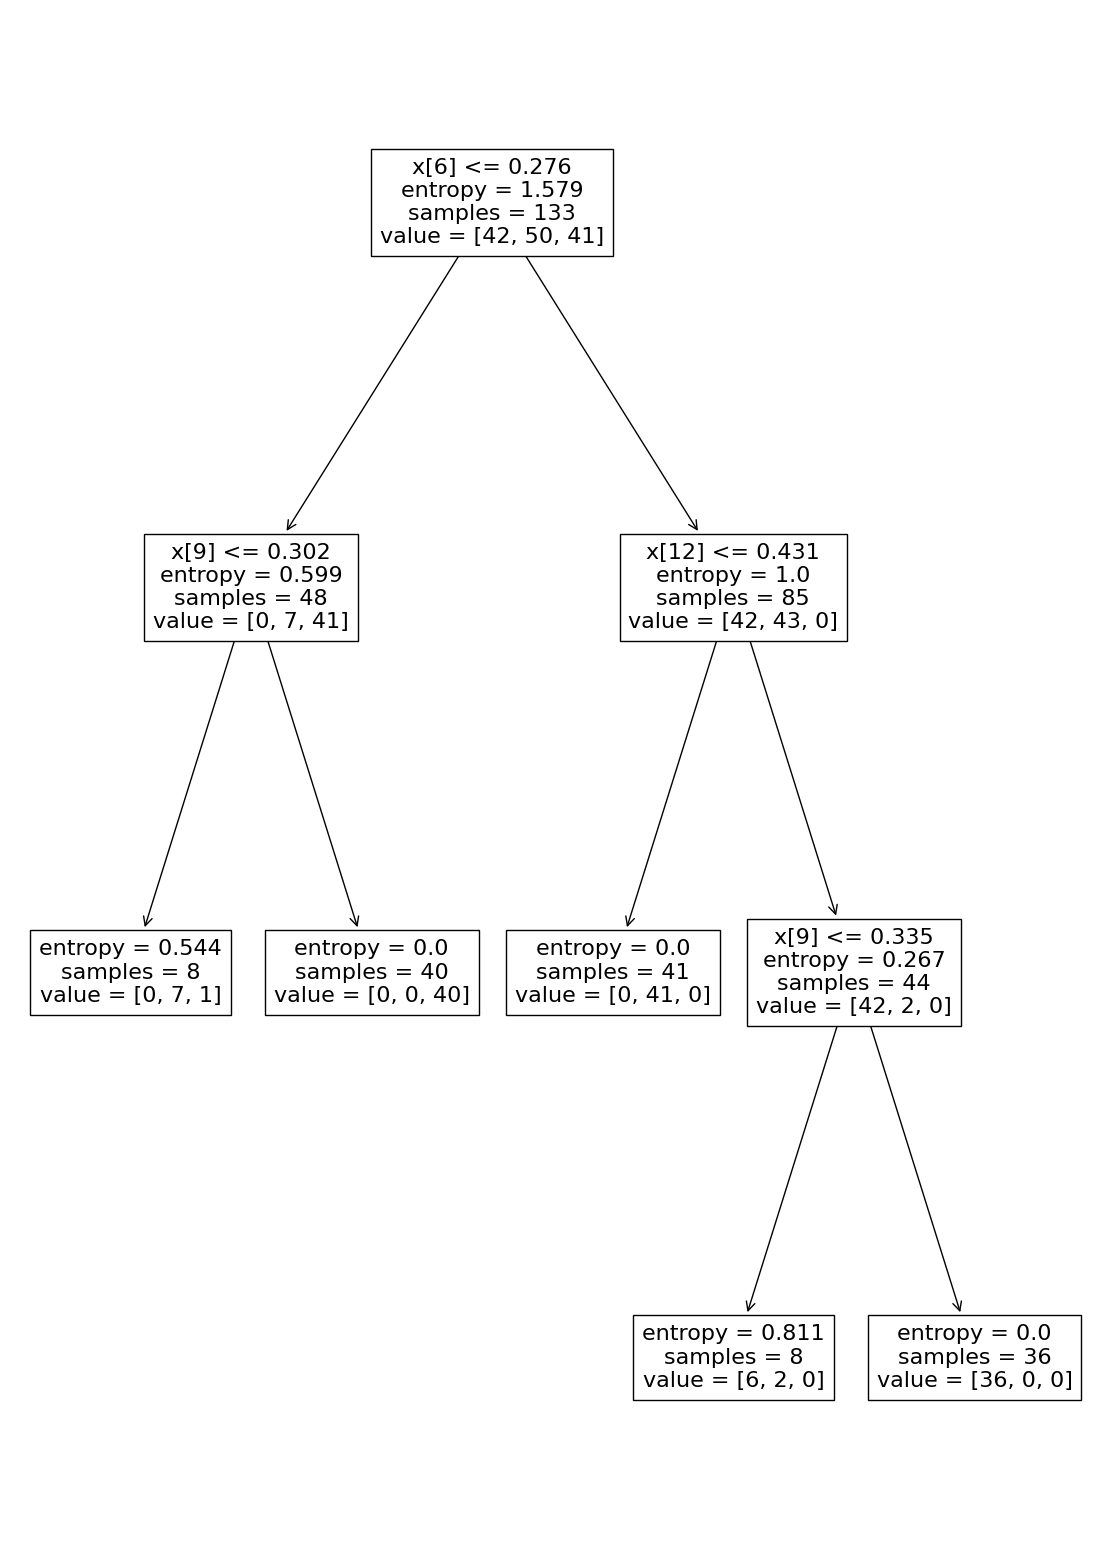

In [44]:
# TODO tree.plot_tree()
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(14,20))
tree.plot_tree(dtree)

# Problem 4:  Random Forests (12 points:  3,5,4)

For this exercise, we'll try using random forests to predict wine quality.  The dataset is from the UCI Machine Learning repository, and rates wines on a scale from 1 to 10.  To turn this into a binary classification problem, we are just interested in identifying wines with a quality score of 7 or more.

In [45]:
from google.colab import files

uploaded = files.upload() # Upload winequality-red.csv

Saving winequality-red.csv to winequality-red.csv


In [46]:
import pandas as pd

df = pd.read_csv('winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


To help you, below we've turned the final column into a *target* vector and created a DataFrame *features* that consists of all the other columns.

In [47]:
target = df['quality'] >= 7
features = df.iloc[:,0:11]

a, 3 pts) Separate the features and target vector into training and testing data with scikit-learn's *train_test_split()* function.

In [52]:
# TODO
from sklearn.model_selection import train_test_split
target_train, target_test, features_train, features_test = train_test_split(target,features)

b, 5 pts) Use the RandomForestClassifier of sklearn.ensemble to create a random forest with 200 trees.  Train on the training data with *fit()*, and test on the test data with *score()*.

In [53]:
# TODO
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 200)
forest.fit(features_train, target_train)
score = forest.score(features_test, target_test)                  
print("forest score = ", score )

forest score =  0.9275


c, 4 pts) Consult the classifier's feature_importances_ attribute.  What is the most important feature that the classifier is using to classify the wines?

In [55]:
# TODO feature_importances_
forest.feature_importances_

array([0.07330492, 0.09747208, 0.08595444, 0.07142004, 0.07287548,
       0.06396413, 0.08949307, 0.09934877, 0.05879699, 0.12619382,
       0.16117627])

**TODO most important feature?**
The most important feature is wine